In [3]:
# Importing all neccesery librarys 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set_theme()
pd.options.display.max_columns = 999

In [4]:
# importing dataset and storing it in a variable. Displaying first five rows of the data. 
data = pd.read_csv(r"C:\Users\mariu\OneDrive\Desktop\Datasets\credit card customers prediction\BankChurners_v2.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Checking data shape 
data.shape

(10127, 23)

# DATA CLEANING

In [6]:
# Checking for uniques. 
data['CLIENTNUM'].nunique()

10127

In [7]:
# checking for duplicates in data
data.drop_duplicates(inplace=True)


In [8]:
# Checking data shape for any changes after drop_duplicates
data.shape

(10127, 23)

NO DUPLICATES BASED ON CLIENTNUM 

SUBSETTING THE DATA

In [9]:
# Looking at dataset columns 
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

There are two additional variables here 'Naive_bayes...' which won't be needed for analysis and will be removed. 

In [10]:
# removing two additional variables from dataset and storing it again in data variable 
data = data [['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

DATATYPES

In [11]:
# checking the data types in dataset 
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

MISSING VALUES 

In [12]:
# Checking for missing values
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

FINDINGS #

Educational level, Marital status, Income category are all missing Values. These are categorical variables and can be replaced with a string called UNKNOWN. 
Looking through all the diffrent customers to understand who has been impacted and wheter or not there is a trend. In this case there is no trend and can be replaced by string Unknown. 

In [13]:
# Looking at what rows are being impacted 
data[data['Education_Level'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [14]:
# Filling the missing values in Education_Level, Marital_Status and Income_Category with string 'Unknown'
data['Education_Level'] = data['Education_Level'].fillna("Unknown")
data['Marital_Status'] = data['Marital_Status'].fillna("Unknown")
data['Income_Category'] = data['Income_Category'].fillna("Unknown")

In [15]:
# Checking if everything was correctly changed in missing values 
data[data['Education_Level']=='Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [16]:
# Re checking if the missing values are being cleared
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# DATA TRANSFORMATION: Binning 

To bin ages there is few data points requried: The min and max ages.


In [17]:
# Printing min and max customer age
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [19]:
# Creating bins using DF.CUT method 
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [18]:
# subsetting the data to verify the above code 
data[data['Customer_Age'] == 30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
789,90821,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465
803,90835,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206
890,90922,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243
939,90971,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239
974,91006,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,100030,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300
10004,100036,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595
10021,100053,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10055,100087,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000


EDA 
SANITY CHECKS

In [20]:
# Counting Values for Attrition_Flag 
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [21]:
# Checking if 16% of dataset is Attrited Customers 
data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]

0.1606596227905599

In [94]:
# Below code will dynamically store new % number if the dataset changes in the future
print(round(data['Attrition_Flag'].value_counts()
            ['Attrited Customer'] / data.shape[0] * 100, 2),"% of our customers have churned")

16.07 % of our customers have churned


SUMMARY STATISTICS 

LOOKING AT:

1: how many instances are in the dataset 

2: a measure of central tendency (mean, medium, mode)

3: the spread of the dataset (variance, standard deviation)

The mean is the average of all values in a dataset, while the median represents the midpoint of the values (50% above and 50% below)

In [22]:
# using describe method to see the metrics for all the numerical variables in the dataset. 
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,95095.000000,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,90032.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,92563.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,95095.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,97626.500000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,100158.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


1: The longest customer in the dataset has been around for 56 months or about years and a half. (Max)

2: The average number of relationships a customer has is 4. (Mean and Median agree here)

3: The average credit limit is $8.6K, but the median credit limit is much lower at $4.5K. 

In [24]:
# Printing and rounding the Total_Relationship_Count 
print('The average Total_Relationship_Count is', round
      (np.mean(data['Total_Relationship_Count']), 2), 'and the medium is', 
      round(np.median(data['Total_Relationship_Count']), 2))

The average Total_Relationship_Count is 3.81 and the medium is 4.0


In [25]:
# Printing and rounding the average Credit_limit
print('The average Credit_Limit is $',round
      (np.mean(data['Credit_Limit']), 2), 'and the medium is $', 
    round(np.median(data['Credit_Limit']), 2))

The average Credit_Limit is $ 8631.95 and the medium is $ 4549.0


# Data Visualization

DISTRIBUTIONS

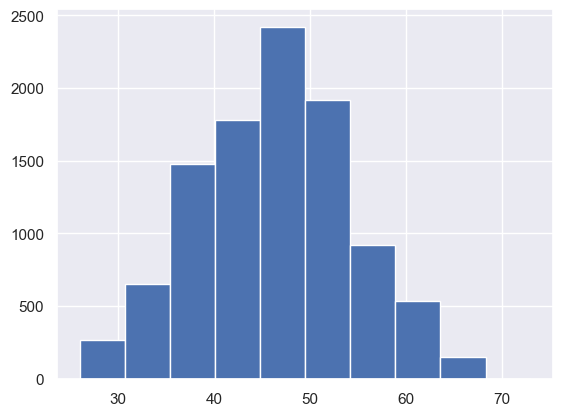

In [26]:
# Visualize Customer AGE distribution
plt.hist(data['Customer_Age']);

Based on this diagram customer age are fairly normally distributed. Y axis represents frequencies(in this case customers) and X axis represents age bins. 

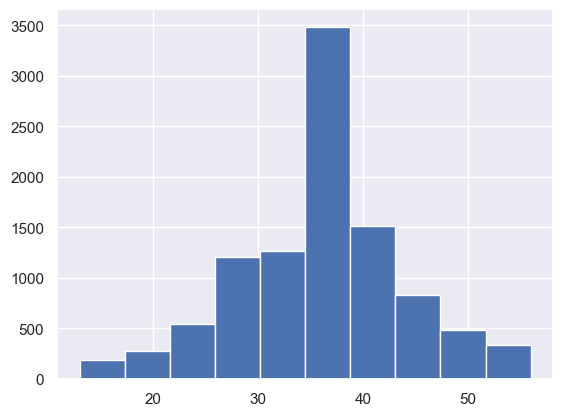

In [27]:
# Visualize Months_on_book distribution
plt.hist(data['Months_on_book']);

The distribution of months_on_book looking quite normal outside the very strong peak at about 36 months. It will need follow up on this to find out what was the cause of the peak. 

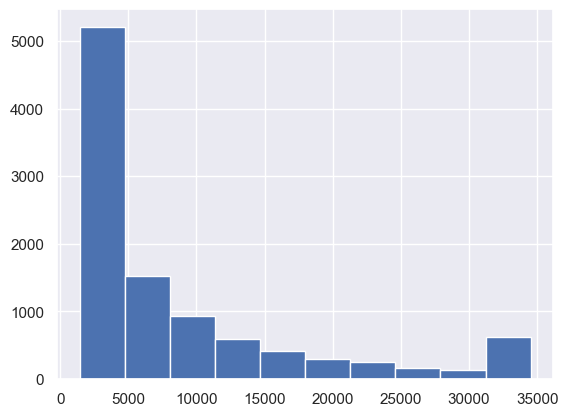

In [28]:
plt.hist(data['Credit_Limit']);

Credit_Limit has a very diffrent ditribution. 

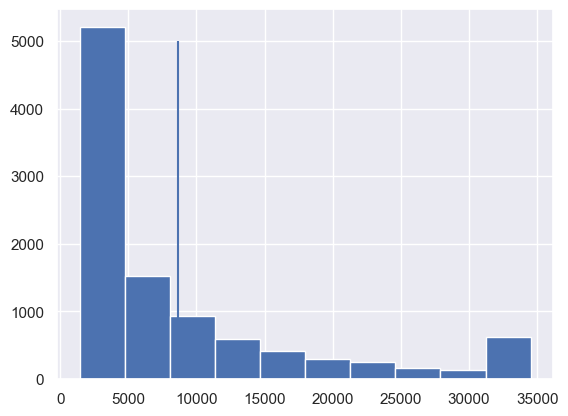

In [29]:
# Adding vertical lines at the mean and median from 0 to 5000
plt.hist(data['Credit_Limit'])
plt.vlines(data['Credit_Limit'].mean(),0, 5000)
plt.vlines(data['Credit_Limit'].median(),0, 5000)

Mean and Median are looking to be in the same spot. Will calculate mean and median to check. 

In [30]:
# Calculating mean for Credit_Limit
data['Credit_Limit'].mean()

8631.953698034955

In [31]:
# Calculating median for Credit_Limit
data['Credit_Limit'].median()

4549.0

After calculating mean and median I can clearly see they are significantly diffrent. I need to improve visualisation to make sure the diffrence is visible. 

Text(0.5, 0, 'Credit Limit')

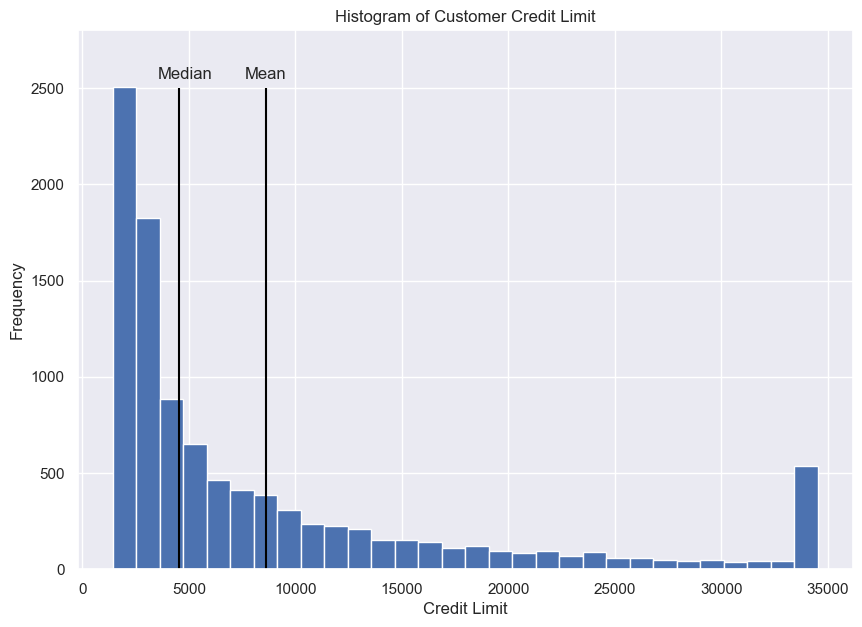

In [32]:
# Creating a visualisation for customer credit limit 
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins = 30)

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors= 'Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors= 'Black')
plt.text(data['Credit_Limit'].mean() -1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median() -1000, 2500+50, "Median")
plt.ylim(0, 2800)
plt.title("Histogram of Customer Credit Limit")
plt.ylabel("Frequency")
plt.xlabel("Credit Limit")


Now it is clear that credit limit its a skewed variable. It is validated by the median and mean more visible on visualisation. Mean is being skewed to the right with the few customers that have very high credit limits. It is a right-skewed distribution. 

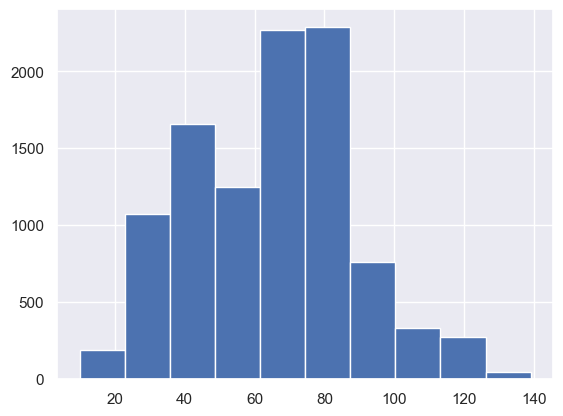

In [33]:
# Creating histogram for total_trans_ct
plt.hist(data['Total_Trans_Ct']);

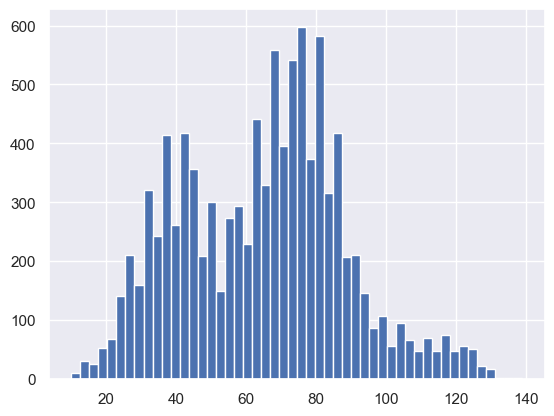

In [34]:
# Increasing the bin size to 50 
plt.hist(data['Total_Trans_Ct'], bins=50);


DATA TRANSFORMATION: NORMALIZATION AND LOG


In [35]:
# Creating a function to convert all data points into values between two diffrent values
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower) / (upper - lower)
    return y 

In [36]:
# Pass Credit_Limit to normalize function
normalize(data['Credit_Limit'])

0        0.340190
1        0.206112
2        0.059850
3        0.056676
4        0.099091
           ...   
10122    0.077536
10123    0.085819
10124    0.120042
10125    0.116172
10126    0.270566
Name: Credit_Limit, Length: 10127, dtype: float64

In [37]:
# Applying the log transformation 
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

To see exactly how these transformations impact the variables we're looking at I will use seaborn subplots. 

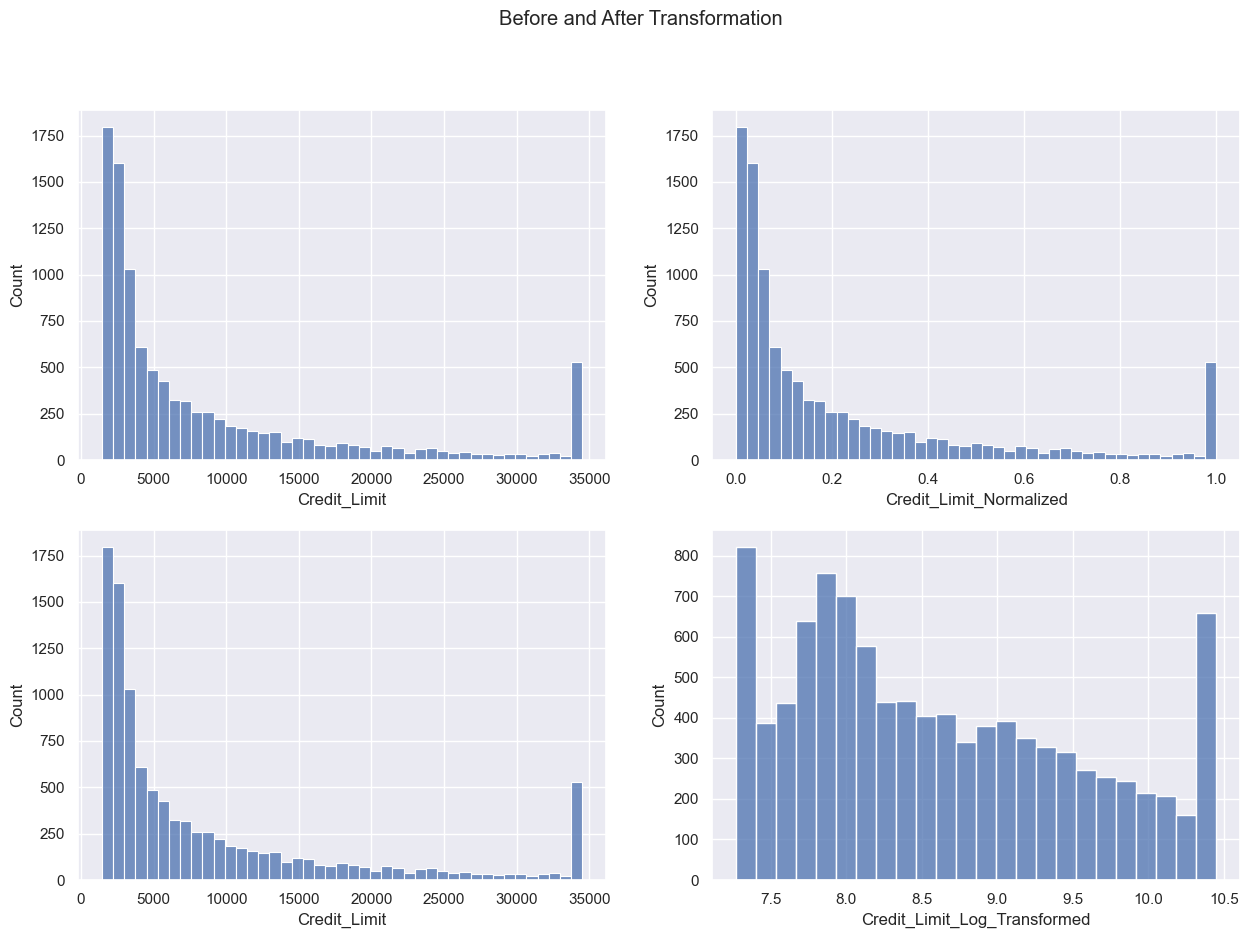

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Before and After Transformation")

#Create boxplot in each subplot
sns.histplot(data, x ="Credit_Limit", ax=axes[0, 0])
sns.histplot(data, x ="Credit_Limit_Normalized", ax=axes[0, 1])
sns.histplot(data, x ="Credit_Limit", ax=axes[1, 0])
sns.histplot(data, x ="Credit_Limit_Log_Transformed", ax=axes[0-1, 1]);



Side by side visulisation of the before and afters for credit limit. 

OTHER DISTRIBUTIONS PLOTS

BOX and WISKER PLOT

The box and whisker plot will allow me to quickly find and identify the median, quartiles and any outliers. 

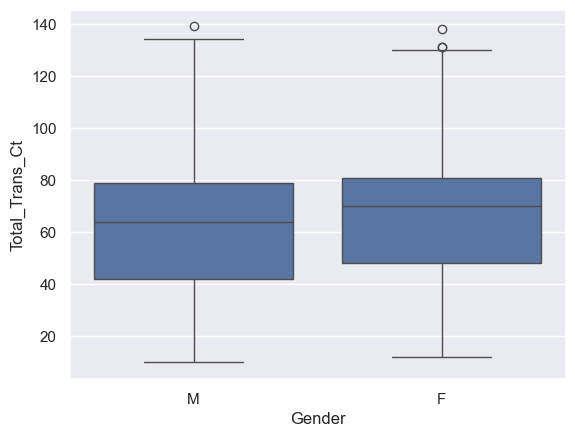

In [39]:
# Total transaction count by gender 
sns.boxplot(x = data['Gender'], y = data['Total_Trans_Ct']);

The above Plot shows us that the median transaction is slightly higher for females than males. 

QUESTION: Was there a difference in the distribution of customers by age and gender?

PYRAMID CHART 

In [40]:
# Aggregate the data to age and group level 
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()

C:\Users\mariu\AppData\Local\Temp\ipykernel_28652\1665759044.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
pyramid

,Gender,Customer_Age_bins,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,F,70s,0
6,M,20s,102
7,M,30s,885
8,M,40s,2151
9,M,50s,1379


Based on the Above pyramid data frame there is 93 customers falling into the female 20s bin

In [42]:
women_bins = np.array(-1 * pyramid[pyramid['Gender'] == 'F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender'] == 'M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500, -2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500],
                       ticktext=[2500, 2000, 1500, 1000, 500, 0, 500, 1000, 1500, 2000, 2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
                 x=men_bins,
                 orientation='h',
                 name='Men',
                 text=men_bins.astype('int'),
                 hoverinfo='x',
                 marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=p_data, layout=layout))

There is no much real diffrence in the distribution of customers by age or gender. The Majority of Customers are in their 40s.

COMPARING CATEGORIES 

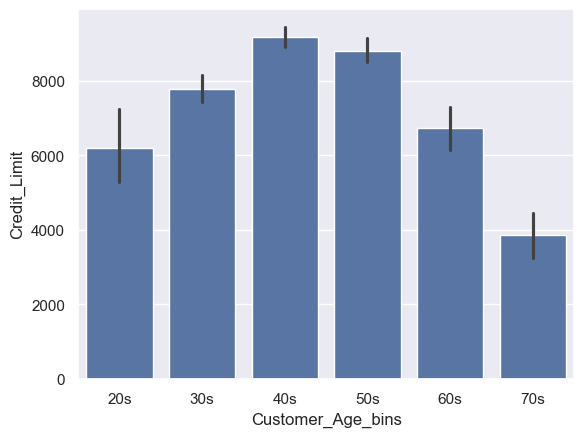

In [43]:
# Credit limit by age and gender
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

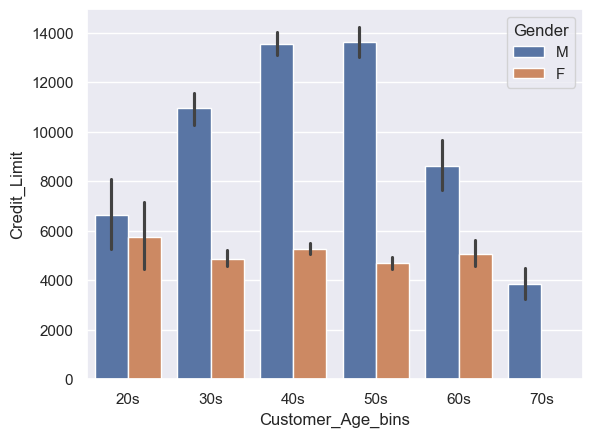

In [44]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

Looking at above bar charts its visible that females are getting much lower credit limits than male counterparts. 

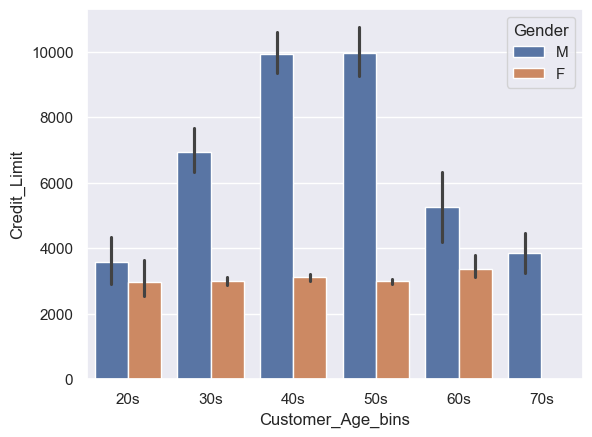

In [45]:
# Changed estimator parameter from mean to median
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.median);

Looking at above bar chart it's visible that it is true to previous chart, men are getting accepted for higher credit limits than women are this company. 

In [46]:
# Aggregating credit limits and taking the mean across each gender age bin
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index
barplot

C:\Users\mariu\AppData\Local\Temp\ipykernel_28652\3979145091.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<bound method Series.reset_index of Customer_Age_bins  Gender
20s                F          5731.101075
                   M          6649.367647
30s                F          4867.775314
                   M         10948.605311
40s                F          5270.821784
                   M         13557.484844
50s                F          4702.649475
                   M         13635.717041
60s                F          5053.412857
                   M          8626.832000
70s                F                  NaN
                   M          3860.500000
Name: Credit_Limit, dtype: float64>

<Axes: xlabel='Credit_Limit', ylabel='Customer_Age_bins'>

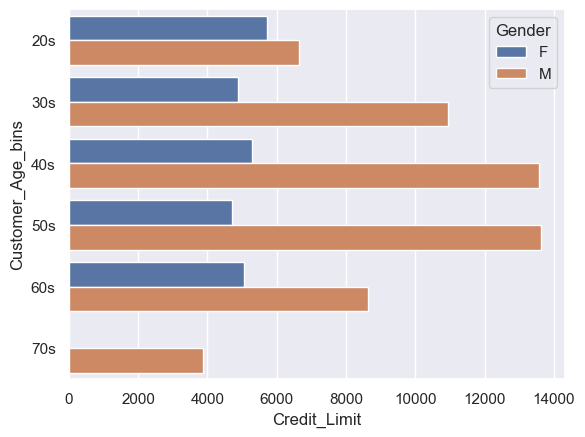

In [47]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=barplot(), estimator=np.mean, orient='h')


In [48]:
# Create lolipop chart 
lolipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lolipop

C:\Users\mariu\AppData\Local\Temp\ipykernel_28652\1599260766.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


<StemContainer object of 3 artists>

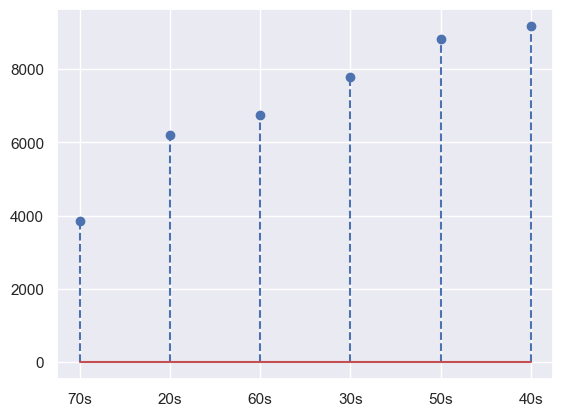

In [49]:
plt.stem(lolipop['Customer_Age_bins'], lolipop['Credit_Limit'], linefmt='--')

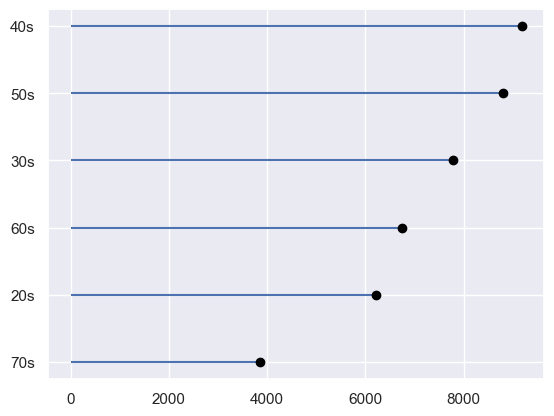

In [50]:
fig, ax = plt.subplots()
ax.hlines(lolipop['Customer_Age_bins'], xmin=0, xmax=lolipop['Credit_Limit'])
ax.plot(lolipop['Credit_Limit'], lolipop['Customer_Age_bins'], "o", color='black')


DATA VISUALIZATION: DATA TABLES


In [51]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_Age_bins', 'Credit_Limit_Normalized',
       'Credit_Limit_Log_Transformed'],
      dtype='object')

In [52]:
# Aggregating Data 
data.groupby(['Attrition_Flag']).agg({'CLIENTNUM': 'nunique', 
                                     'Customer_Age': 'mean',
                                     'Months_on_book': 'mean',
                                     'Total_Relationship_Count': 'mean',
                                     'Months_Inactive_12_mon': 'mean',
                                     'Contacts_Count_12_mon': 'mean', 
                                     'Credit_Limit': 'mean',
                                     'Total_Revolving_Bal': 'mean',
                                     'Avg_Open_To_Buy': 'mean',
                                     'Total_Amt_Chng_Q4_Q1': 'mean',
                                     'Total_Trans_Amt': 'mean',
                                     'Total_Trans_Ct': 'mean',
                                    'Total_Ct_Chng_Q4_Q1': 'mean',
                                    'Avg_Utilization_Ratio': 'mean'
                                     })

,CLIENTNUM,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,1627,46.659496,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,8500,46.262118,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [53]:
# Creating data pivot for more clear look 
data_pivot = data.groupby(['Attrition_Flag']).agg({'CLIENTNUM': 'nunique', 
                                     'Customer_Age': 'mean',
                                     'Months_on_book': 'mean',
                                     'Total_Relationship_Count': 'mean',
                                     'Months_Inactive_12_mon': 'mean',
                                     'Contacts_Count_12_mon': 'mean', 
                                     'Credit_Limit': 'mean',
                                     'Total_Revolving_Bal': 'mean',
                                     'Avg_Open_To_Buy': 'mean',
                                     'Total_Amt_Chng_Q4_Q1': 'mean',
                                     'Total_Trans_Amt': 'mean',
                                     'Total_Trans_Ct': 'mean',
                                    'Total_Ct_Chng_Q4_Q1': 'mean',
                                    'Avg_Utilization_Ratio': 'mean'
                                     }).T
data_pivot

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,1627.000000,8500.000000
Customer_Age,46.659496,46.262118
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400
Total_Amt_Chng_Q4_Q1,0.694277,0.772510


In [54]:
# Calculating diffrences column
data_pivot['Diff'] = data_pivot['Attrited Customer'] / data_pivot['Existing Customer']
data_pivot.sort_values("Diff")

Attrition_Flag,Attrited Customer,Existing Customer,Diff
CLIENTNUM,1627.000000,8500.000000,0.191412
Total_Revolving_Bal,672.822987,1256.604118,0.535430
Avg_Utilization_Ratio,0.162475,0.296412,0.548140
Total_Trans_Ct,44.933620,68.672588,0.654317
Total_Trans_Amt,3095.025814,4654.655882,0.664931
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,0.746714
Total_Relationship_Count,3.279656,3.914588,0.837804
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,0.898729
Credit_Limit,8136.039459,8726.877518,0.932297
Avg_Open_To_Buy,7463.216472,7470.273400,0.999055


RELATIONSHIPS

In [55]:
# Get numeric data from dataset 
numeric_data = data._get_numeric_data()


In [56]:
# Check what columns comes up as numerical data 
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normalized', 'Credit_Limit_Log_Transformed'],
      dtype='object')

In [59]:
# Removing less needed columns to create a relationship plot
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag']]

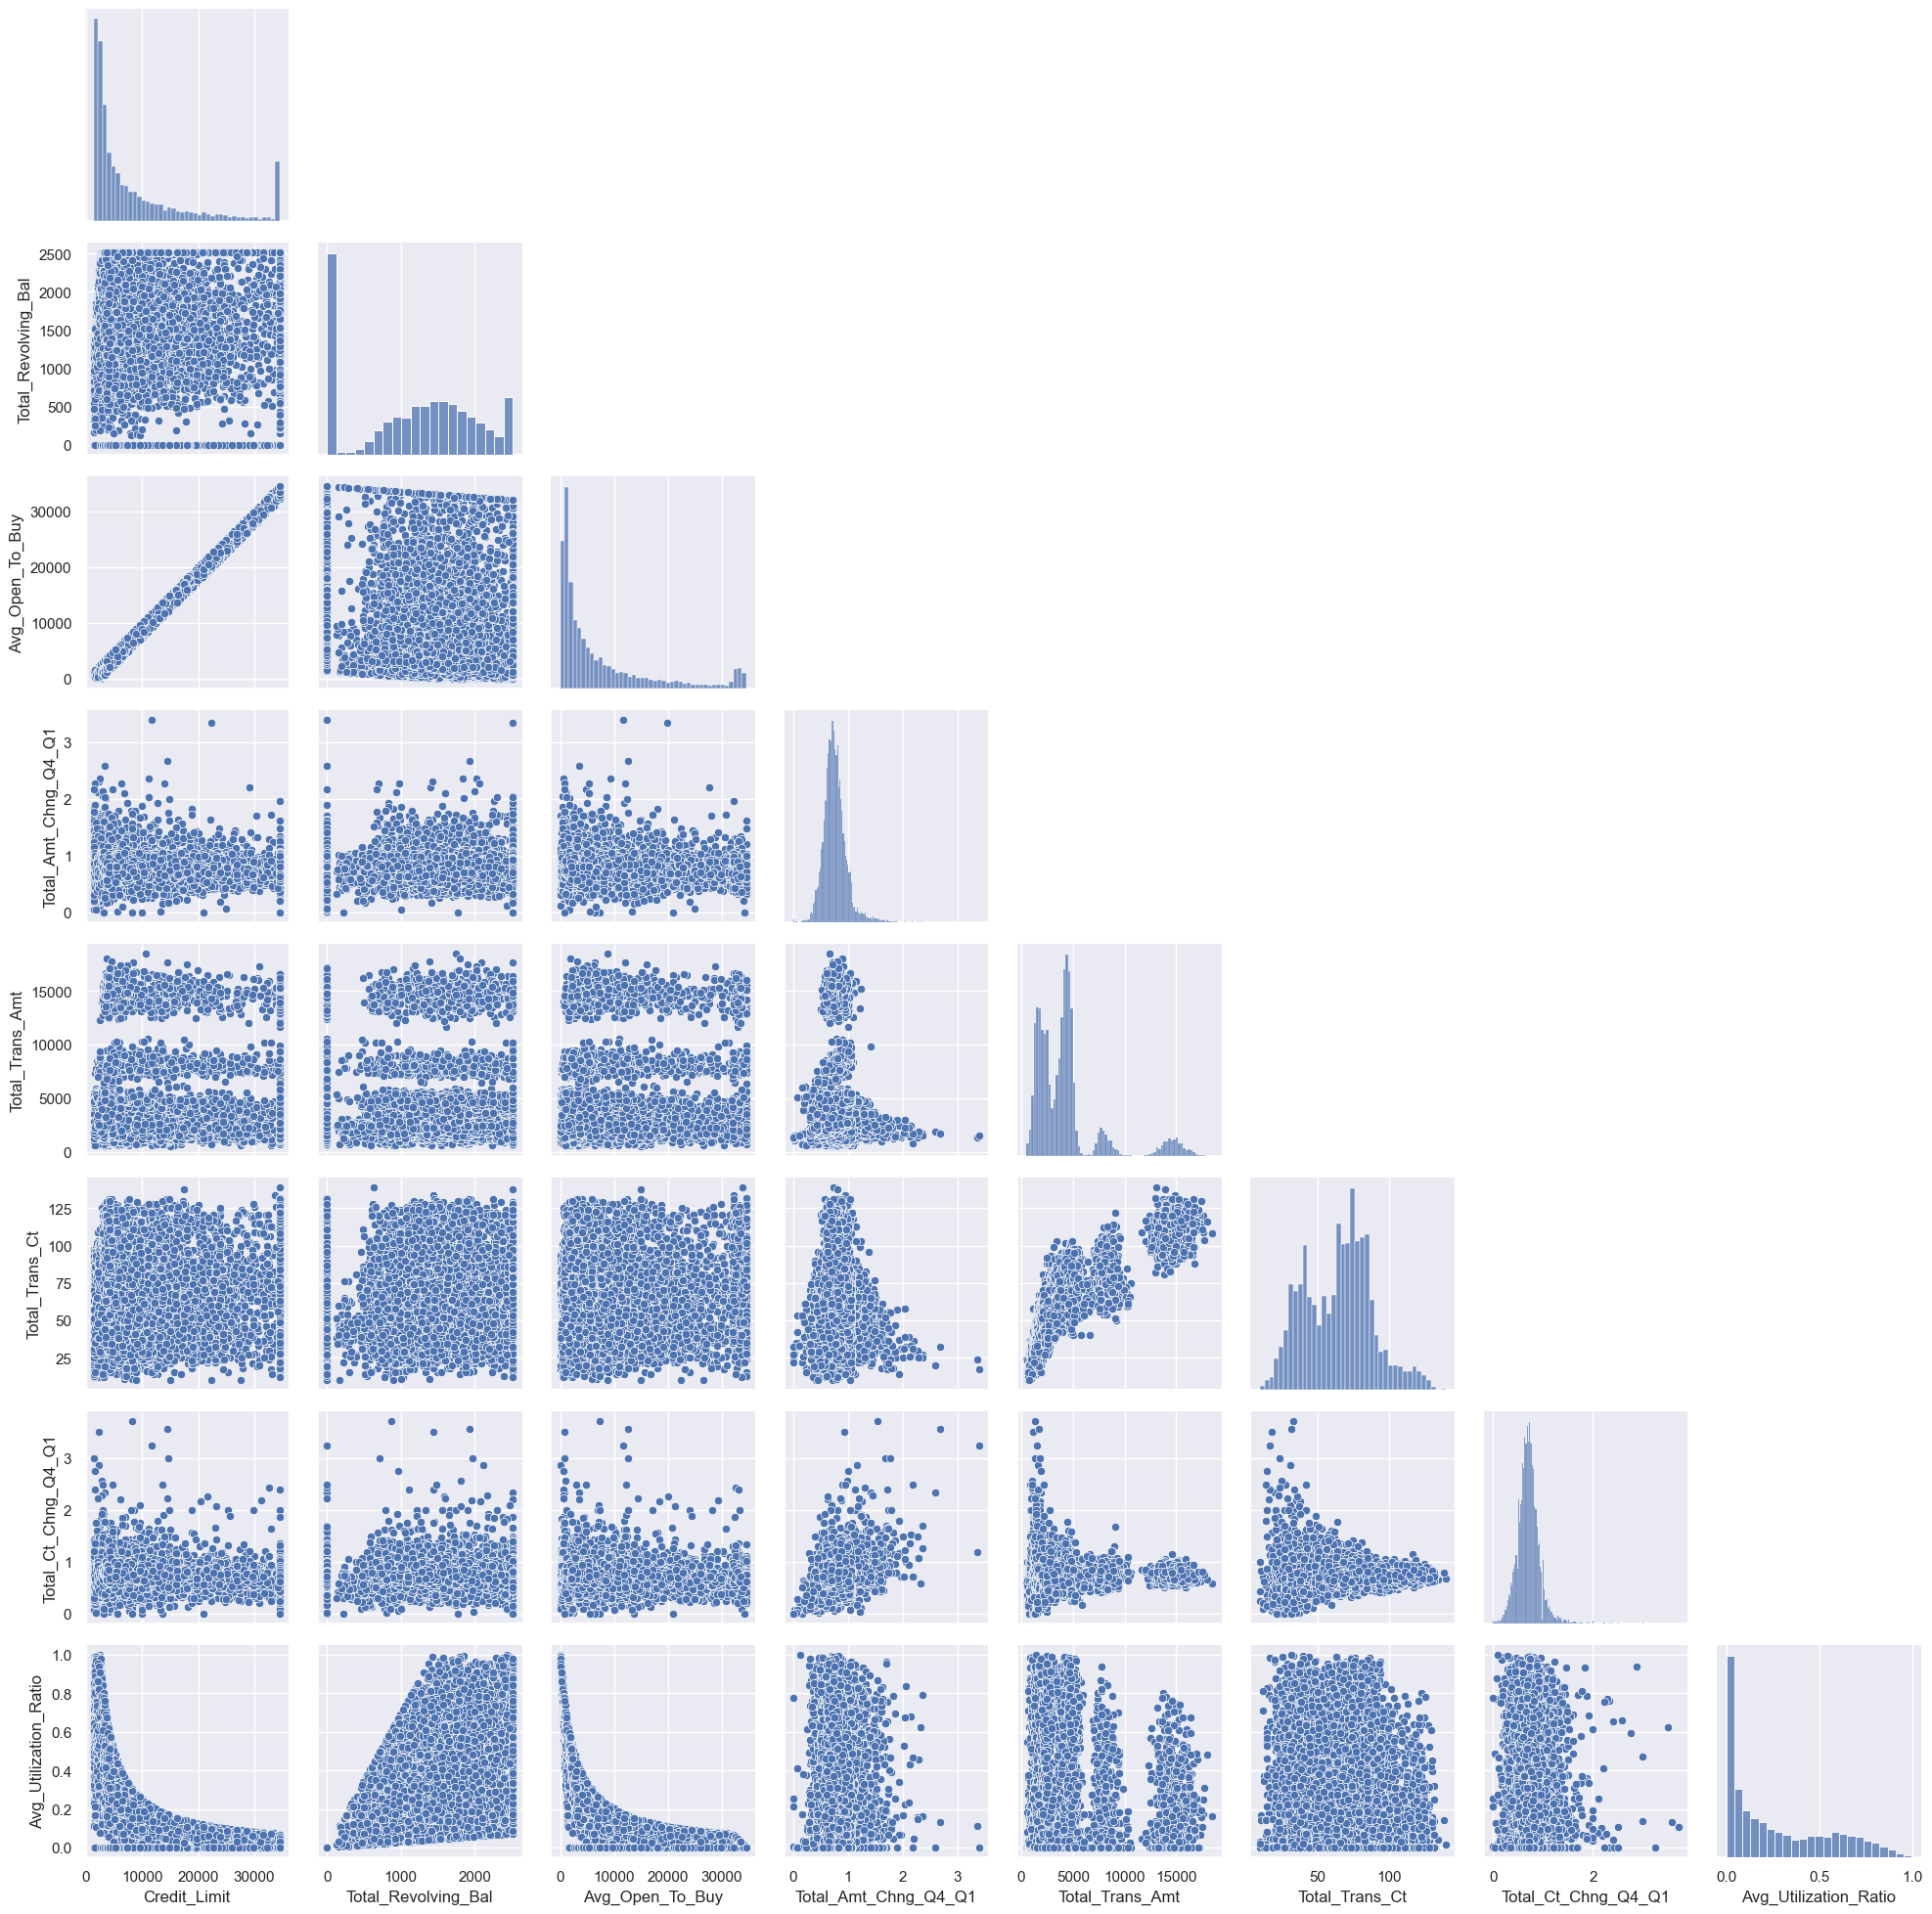

In [60]:
# Creating reletionship visualisations
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

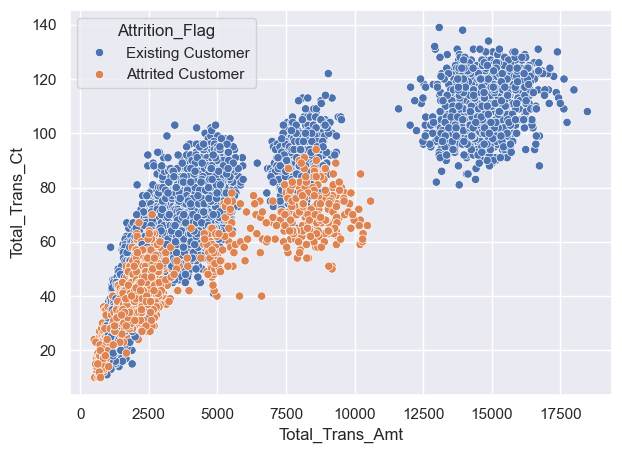

In [64]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', data = data)

FINDINGS #1
Above Plot showing clearly 3 DISTINCT GROUPS. No Attrited Customer's who have spent above 11K.



RIDGE PLOT

In [67]:
# Creating bins and labels cutting off at the 11K mark
bins = [0, 11000, 9000000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False )

In [71]:
# Adding Total_trans_Amt_bin to groupby function
data.groupby(['Total_Trans_Amt_bin','Attrition_Flag']).agg({
        'CLIENTNUM': 'nunique', 
        'Customer_Age': 'mean',
        'Months_on_book': 'mean',
        'Total_Relationship_Count': 'mean',
        'Months_Inactive_12_mon': 'mean',
        'Contacts_Count_12_mon': 'mean', 
        'Credit_Limit': 'mean',
        'Total_Revolving_Bal': 'mean',
        'Avg_Open_To_Buy': 'mean',
        'Total_Amt_Chng_Q4_Q1': 'mean',
        'Total_Trans_Amt': 'mean',
        'Total_Trans_Ct': 'mean',
        'Total_Ct_Chng_Q4_Q1': 'mean',
        'Avg_Utilization_Ratio': 'mean'
        }).T                             

C:\Users\mariu\AppData\Local\Temp\ipykernel_28652\3238878927.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total_Trans_Amt_bin                Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

(0.0, 2.0)

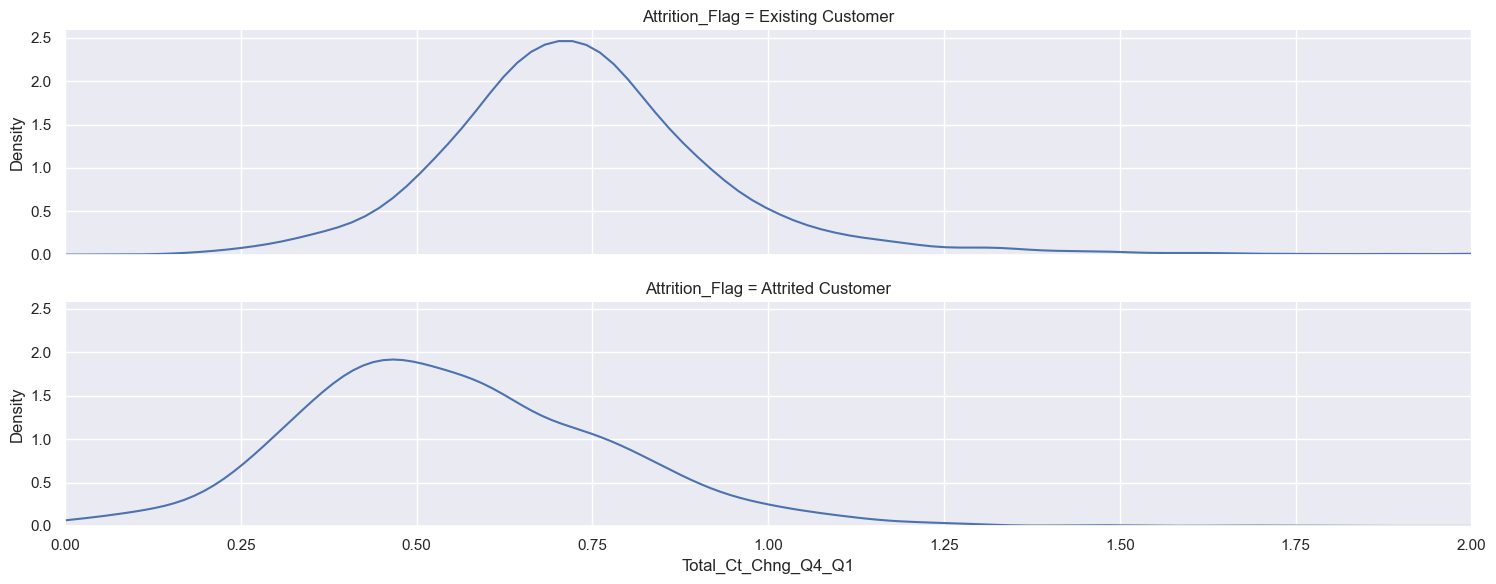

In [75]:
# Creating KDE plots
g = sns.FacetGrid(data, row='Attrition_Flag', aspect = 5, height = 3)
g.map_dataframe(sns.kdeplot, x = 'Total_Ct_Chng_Q4_Q1')
plt.xlim(0,2)

Above visual shows significant diffreneces between Existing Customers and Attrited Customers. 

# PUTTING IT ALL TOGETHER

PROBLEM STATEMENT: 

" What marketing retention campains could we implement to help reduce customer churn?"


In [76]:
# Changing the backgroud color to white to effectively remove the gridlines
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 12)


Text(12500, 40, 'No Churned Customers \n above 11K of Spend')

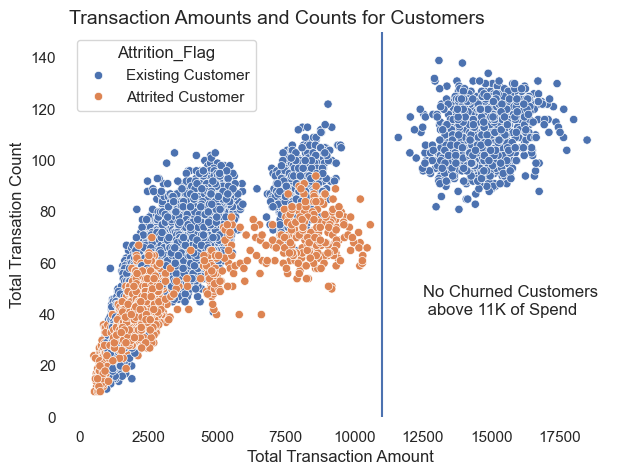

In [82]:
# removing the borders and changing the limits of the y axis
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', data=data)
sns.despine(bottom=True, left=True) 
plt.ylim(0, 150)

# adding axis labels and title 
plt.xlabel("Total Transaction Amount")
plt.ylabel("Total Transation Count")
plt.title("Transaction Amounts and Counts for Customers",
            loc='left', size=14) 

# Adding in vertical line and annotation
plt.vlines(11000, 0, 150)
plt.text(12500, 40, "No Churned Customers \n above 11K of Spend")





(0.0, 2.0)

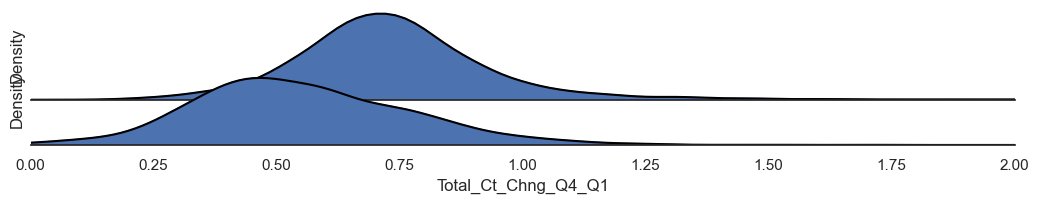

In [91]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0 ,0,0)})
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color="Black")
g.fig.subplots_adjust(hspace=-0.5)  
g.set_titles("")
g.set(yticks=[]) 
g.despine(left=True)
plt.xlim(0,2)



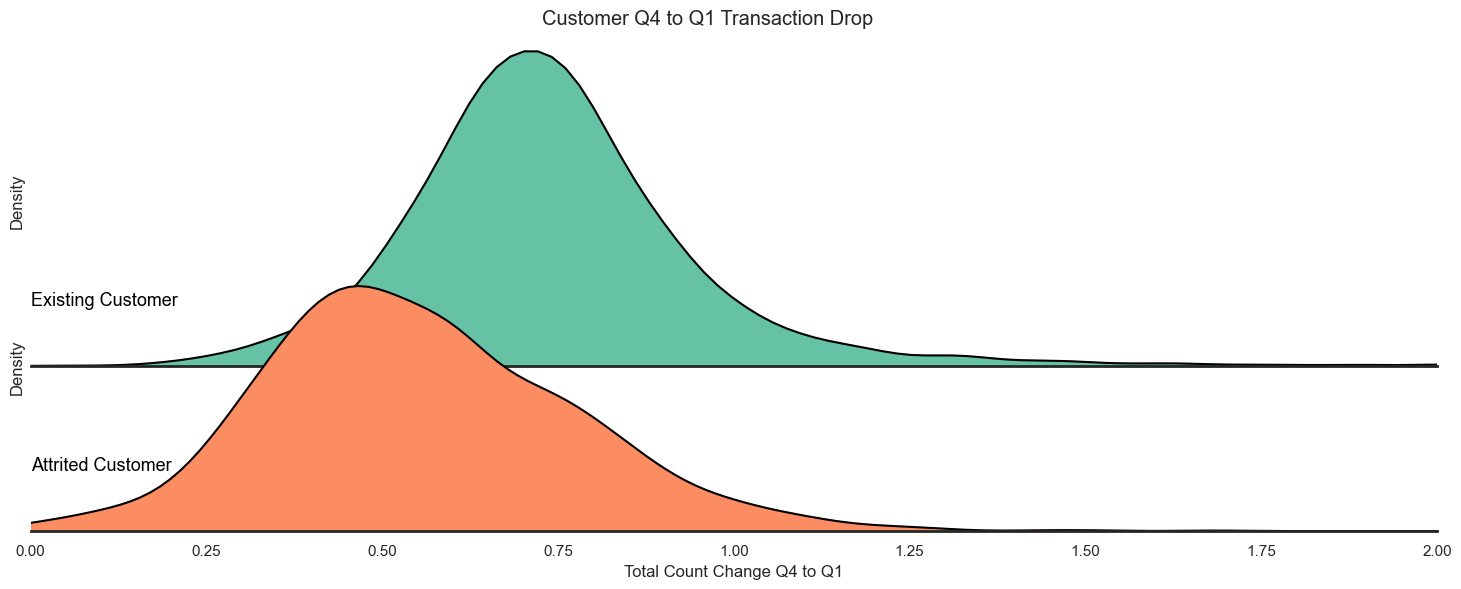

In [92]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

# FINDINGS - CURRENT CUSTOMER JOURNEY:

* Total of 10K customers
* Experienced a 16% churn rate
* Average customer has been around 36 months
* Average age of our customers is 46 with a Credit Limit of 8600


# QUESTION: "How can we get more customers above that 11,000 mark"

* Churn customers, they tend to drop off heavily after the New Year Showing a 55% drop in Q4 to Q1 transactions. It a good opportunity to find and target customers who have seen or that are belived to show a large drop off around the New Year and target them with special offers, discounts, cash back or loyalty points. 

* Possible marketing reengagement campaign implementation to "prevent the cliff" for those who have seen this in the past? How big is this, group, and what's the potential opportunity? 

* Customer surveys

* Offer loyalty points, cash back etc. 

* Next steps: Look at any historical marketing campaigns - can it be learned from what worked/didn't work? 



